**Analisis Trend media sosial di Tiktok,Instagram,Twitter dan Youtube untuk memahami tren media sosial viral,untuk kebutuhan pemasaran**

Tentang Set Data:
Set data ini menangkap denyut tren media sosial viral di TikTok, Instagram, Twitter, dan YouTube. Set data ini memberikan wawasan tentang tagar terpopuler, jenis konten, dan tingkat keterlibatan pengguna, menawarkan gambaran komprehensif tentang bagaimana tren berkembang di berbagai platform. Dengan data regional dan konten yang berfokus pada influencer, set data ini sangat cocok untuk:

- Analisis tren 🔍

- Pemodelan sentimen 💭

- Memahami pemasaran influencer 📈


# input & data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Cleaned_Viral_Social_Media_Trends.csv')
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#mengubah tipe data time ke year
df['Post_Date']=pd.to_datetime(df['Post_Date']).dt.year


In [ ]:
df['Platform'].value_counts()

,count
Platform,
YouTube,1324
TikTok,1260
Instagram,1212
Twitter,1204


***Already clean***

#Instagram

In [ ]:
instagram=df[df['Platform']=='Instagram']
instagram

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
1,Post_2,2022,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
5,Post_6,2022,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low
10,Post_11,2023,Instagram,#Comedy,Live Stream,Germany,4070332,379894,46012,25242,High
26,Post_27,2023,Instagram,#Gaming,Video,India,4369260,212278,21264,18172,Low
28,Post_29,2023,Instagram,#Gaming,Live Stream,Canada,1653907,91836,77370,2823,Low
...,...,...,...,...,...,...,...,...,...,...,...
4991,Post_4992,2022,Instagram,#Fashion,Shorts,Brazil,10157,322897,93292,23766,High
4994,Post_4995,2022,Instagram,#Comedy,Shorts,Brazil,940934,436187,12363,11054,Low
4996,Post_4997,2023,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4998,Post_4999,2023,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


In [ ]:
a=instagram.groupby('Content_Type')['Views'].mean().round().sort_values(ascending=False)
a

,Views
Content_Type,
Post,2587567.0
Tweet,2434468.0
Video,2407529.0
Reel,2357593.0
Shorts,2352192.0
Live Stream,2302790.0


/tmp/ipython-input-23-596008674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Views', y='Content_Type', data=a_df, palette='viridis', order=a_df.sort_values('Views', ascending=False).Content_Type)


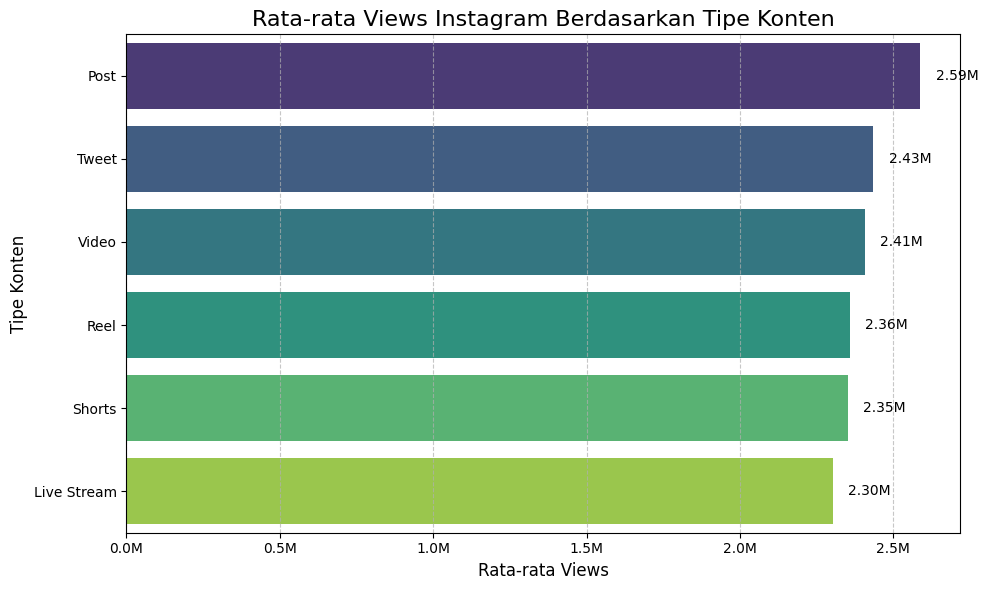

In [ ]:
a_df = a.reset_index()
a_df.columns = ['Content_Type', 'Views']

plt.figure(figsize=(10, 6)) # Mengatur ukuran figure untuk tampilan yang lebih baik

# Membuat Bar Chart menggunakan Seaborn
# Kita menggunakan 'order' untuk memastikan batang diurutkan berdasarkan nilai views
sns.barplot(x='Views', y='Content_Type', data=a_df, palette='viridis', order=a_df.sort_values('Views', ascending=False).Content_Type)

# Menambahkan judul dan label
plt.title('Rata-rata Views Instagram Berdasarkan Tipe Konten', fontsize=16)
plt.xlabel('Rata-rata Views', fontsize=12)
plt.ylabel('Tipe Konten', fontsize=12)

# Mengatur format sumbu X agar lebih mudah dibaca (misalnya, dalam juta)
plt.ticklabel_format(style='plain', axis='x') # Menghilangkan notasi ilmiah

# Menyesuaikan label sumbu X agar menunjukkan nilai dalam juta secara eksplisit
formatter = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Menambahkan nilai rata-rata views di atas (atau di samping) setiap batang
for index, row in a_df.iterrows():
    plt.text(row['Views'] + 50000, # Posisi X (nilai views + sedikit offset)
             index,               # Posisi Y (indeks baris)
             f'{row["Views"]/1000000:.2f}M', # Teks yang ditampilkan (diformat dalam juta)
             color='black', ha="left", va="center", fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7) # Menambahkan grid horizontal untuk keterbacaan

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen pas
plt.show()

In [ ]:
instagram['Hashtag'].value_counts().sort_values(ascending=False)

,count
Hashtag,
#Fitness,143
#Education,131
#Music,127
#Dance,121
#Challenge,120
#Comedy,120
#Fashion,116
#Gaming,114
#Tech,110


In [ ]:
hastag=instagram.groupby('Hashtag')[['Views','Likes']].mean().round().sort_values('Views',ascending=False)
hastag

,Views,Likes
Hashtag,,
#Tech,2679869.0,275687.0
#Gaming,2604944.0,254729.0
#Music,2469994.0,255081.0
#Comedy,2456121.0,250552.0
#Challenge,2426139.0,241921.0
#Viral,2414512.0,271188.0
#Education,2398747.0,271723.0
#Fitness,2305043.0,252576.0
#Fashion,2259821.0,221621.0


**Rata-rata Views dan Likes Instagram Berdasarkan Hashtag**

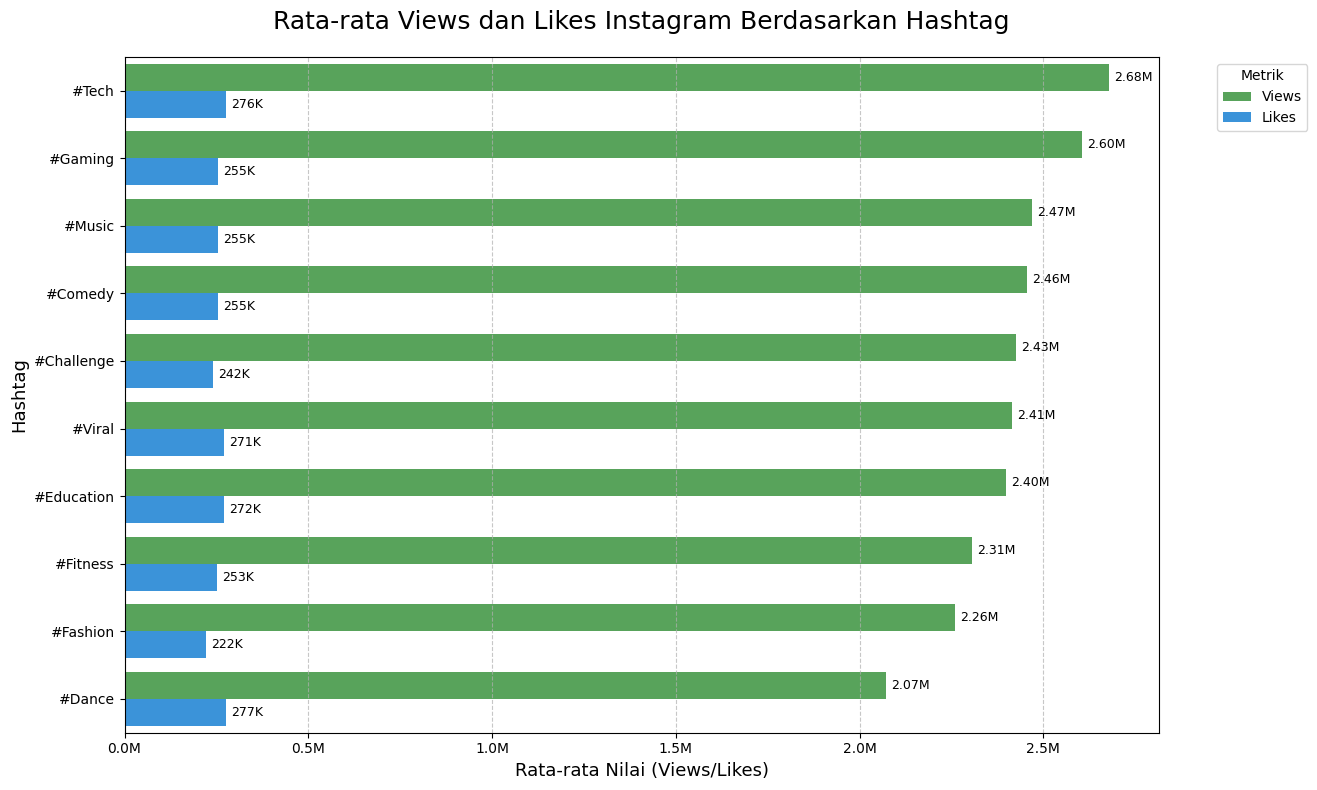

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy untuk operasi numerik jika diperlukan, meskipun tidak esensial di sini

# Data dari gambar yang Anda berikan
data = {
    'Hashtag': ['#Tech', '#Gaming', '#Music', '#Comedy', '#Challenge',
                '#Viral', '#Education', '#Fitness', '#Fashion', '#Dance'],
    'Views': [2679869.0, 2604944.0, 2469994.0, 2456121.0, 2426139.0,
              2414512.0, 2398747.0, 2305043.0, 2259821.0, 2073080.0],
    'Likes': [275687.0, 254729.0, 255081.0, 255052.0, 241921.0,
              271188.0, 271723.0, 252576.0, 221621.0, 277005.0]
}

df_hashtag = pd.DataFrame(data)

# Data sudah terurut berdasarkan Views di gambar, kita akan mempertahankan urutan ini.
# Seaborn secara otomatis akan menggunakan urutan kategori dari DataFrame jika kita menggunakan `y` sebagai kategori.

# Untuk membuat grouped bar chart, kita perlu "melebur" (melt) DataFrame agar ada satu kolom untuk "Metric" (Views/Likes)
# dan satu kolom untuk "Value".
df_melted = df_hashtag.melt(id_vars='Hashtag', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8)) # Ukuran figure yang lebih besar untuk menampung banyak batang

# Membuat Grouped Bar Chart menggunakan Seaborn
sns.barplot(
    x='Value',
    y='Hashtag',
    hue='Metric', # 'Hue' akan memisahkan batang berdasarkan 'Views' dan 'Likes'
    data=df_melted,
    palette={'Views': '#4CAF50', 'Likes': '#2196F3'}, # Contoh palette hijau dan biru
    # Anda juga bisa menggunakan palette default Seaborn seperti 'viridis', 'magma', 'flare', dll.
    # Jika ingin mempertahankan urutan hashtag yang sama seperti input, tambahkan order=df_hashtag['Hashtag'].tolist()
    # Tapi karena kita melt, Seaborn akan mengurusnya dengan baik jika ordernya sudah benar di df_hashtag.
)

# Menambahkan judul dan label
plt.title('Rata-rata Views dan Likes Instagram Berdasarkan Hashtag', fontsize=18, pad=20)
plt.xlabel('Rata-rata Nilai (Views/Likes)', fontsize=13)
plt.ylabel('Hashtag', fontsize=13)

# Mengatur format sumbu X agar lebih mudah dibaca (dalam juta)
plt.ticklabel_format(style='plain', axis='x')
formatter_views = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
formatter_likes = plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M') # Untuk Likes mungkin dalam K
# Karena satu sumbu X untuk Views dan Likes, kita harus memilih format yang konsisten.
# Views dalam Juta, Likes dalam Ratus Ribu atau Juta.
# Paling aman adalah semua dalam Juta, atau semua dalam K, atau menggunakan notasi M/K otomatis.
# Mari kita gunakan format yang menampilkan M untuk views, dan K untuk likes jika di bawah 1M.
# Namun, karena Views dan Likes ada pada skala yang berbeda, menggunakan satu formatter mungkin menantang.
# Untuk kesederhanaan dan kejelasan, mari kita tampilkan semua dalam jutaan.

formatter = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Menambahkan nilai di atas (atau di samping) setiap batang
# Ini sedikit lebih rumit untuk grouped bar chart
for p in plt.gca().patches:
    # get_width() = lebar batang
    # get_y() + get_height()/2 = posisi tengah vertikal batang
    width = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2

    # Menentukan nilai sebenarnya dari data melted
    # Kita perlu mencocokkan patch dengan nilai di df_melted
    # Ini memerlukan sedikit logika untuk mengetahui patch mana yang mana

    # Cara yang lebih mudah adalah dengan iterasi pada df_melted dan menempatkan teks
    # di posisi yang sudah diketahui (menggunakan koordinat batang yang benar)

    # Hapus for loop ini, kita akan lakukan dengan cara yang lebih terkontrol
    pass # Placeholder

# Menambahkan anotasi teks secara manual untuk setiap bar jika diinginkan,
# atau mengandalkan formatter sumbu X saja.
# Menambahkan anotasi ke grouped bar chart bisa menjadi sangat padat.
# Mari kita pertimbangkan untuk tidak menambahkan teks di setiap batang
# dan mengandalkan sumbu X dan legenda, atau hanya menambahkan teks untuk satu metrik utama.

# Jika tetap ingin menambahkan teks:
for i, row in df_melted.iterrows():
    # Posisi teks: di ujung kanan batang
    x_pos = row['Value'] + (plt.xlim()[1] * 0.005) # Sedikit offset dari ujung batang
    y_pos = df_melted[df_melted['Hashtag'] == row['Hashtag']].index[0] # Dapatkan posisi y berdasarkan Hashtag

    # Untuk mendapatkan y_pos yang akurat pada barplot, kita bisa ambil dari posisi bar
    # namun itu kompleks. Lebih baik kita andalkan format sumbu X dan legenda.
    # Jika anotasi teks di setiap batang sangat diinginkan, biasanya lebih baik
    # menggunakan pendekatan yang lebih kustom dengan matplotlib, atau library yang lebih interaktif.

    # Untuk grouped bar chart yang rapi, kadang-kadang lebih baik tanpa anotasi langsung
    # di setiap batang, atau hanya untuk metrik yang paling penting.
    # Namun, saya akan mencoba menempatkannya dengan hati-hati.

    # Perhitungan posisi Y untuk grouped bar chart
    bars = plt.gca().containers # Dapatkan list of bar containers for each 'hue' group

    # Cari bar yang sesuai
    if row['Metric'] == 'Views':
        # Views bars
        idx_in_container = df_hashtag.index[df_hashtag['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[0][idx_in_container] # Asumsi bars[0] adalah Views
    else: # Likes bars
        idx_in_container = df_hashtag.index[df_hashtag['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[1][idx_in_container] # Asumsi bars[1] adalah Likes

    x_pos_text = bar_obj.get_width() + (plt.xlim()[1] * 0.005)
    y_pos_text = bar_obj.get_y() + bar_obj.get_height() / 2

    # Format nilai: Views dalam M, Likes dalam K (jika di bawah 1 juta), atau M
    if row['Metric'] == 'Views':
        text_val = f'{row["Value"]/1000000:.2f}M'
    else: # Likes
        text_val = f'{row["Value"]/1000:.0f}K' if row["Value"] < 1000000 else f'{row["Value"]/1000000:.2f}M'

    plt.text(x_pos_text,
             y_pos_text,
             text_val,
             color='black',
             ha="left",
             va="center",
             fontsize=9)


plt.grid(axis='x', linestyle='--', alpha=0.7) # Menambahkan grid horizontal untuk keterbacaan

# Memindahkan legenda agar tidak menutupi plot
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Sesuaikan layout agar legenda tidak terpotong
plt.show()

# Tiktok

In [ ]:
tiktok=df[df['Platform']=='TikTok']
tiktok

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
4,Post_5,2023,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
9,Post_10,2023,TikTok,#Gaming,Shorts,India,3898384,8634,69378,42700,Low
17,Post_18,2022,TikTok,#Tech,Shorts,UK,2051091,24472,54704,41737,Medium
18,Post_19,2022,TikTok,#Fashion,Post,USA,3461154,165335,50077,19505,Low
...,...,...,...,...,...,...,...,...,...,...,...
4980,Post_4981,2022,TikTok,#Fashion,Reel,Brazil,3512927,105027,72035,9542,High
4984,Post_4985,2022,TikTok,#Gaming,Reel,USA,3781363,74717,184,38904,Medium
4985,Post_4986,2023,TikTok,#Music,Live Stream,India,379978,409651,84380,34427,Low
4986,Post_4987,2022,TikTok,#Viral,Tweet,USA,741969,301521,87955,15812,Medium


In [ ]:
b=tiktok.groupby('Content_Type')['Views'].mean().round().sort_values(ascending=False)
b

,Views
Content_Type,
Reel,2678071.0
Shorts,2534584.0
Tweet,2509945.0
Post,2504727.0
Video,2456759.0
Live Stream,2405590.0


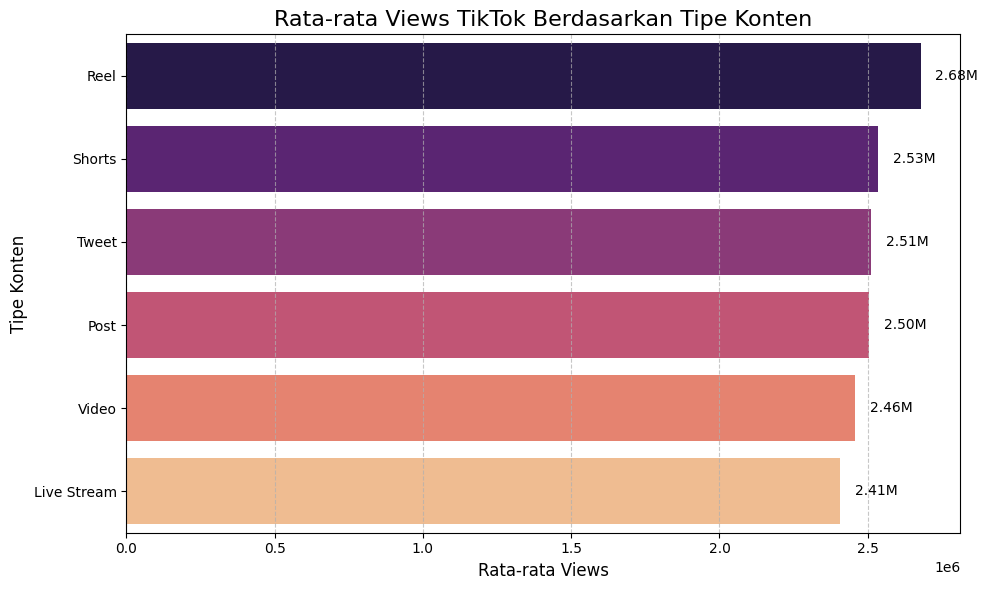

In [ ]:
b_df = b.reset_index()
b_df.columns = ['Content_Type', 'Views']

# Sort the DataFrame by 'Views' in descending order
b_df_sorted = b_df.sort_values('Views', ascending=False)

plt.figure(figsize=(10, 6))

# Create the bar chart using the sorted DataFrame
sns.barplot(x='Views', y='Content_Type', data=b_df_sorted, palette='magma', hue='Content_Type', legend=False)

plt.title('Rata-rata Views TikTok Berdasarkan Tipe Konten', fontsize=16)
plt.xlabel('Rata-rata Views', fontsize=12)
plt.ylabel('Tipe Konten', fontsize=12)

# Add the average views as text labels on the bars
for index, row in enumerate(b_df_sorted.itertuples()):
    plt.text(row.Views + 50000, index, f'{row.Views/1000000:.2f}M', color='black', ha="left", va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hastag_tiktok=tiktok.groupby('Hashtag')[['Views','Likes']].mean().round().sort_values('Views',ascending=False)
hastag_tiktok

,Views,Likes
Hashtag,,
#Fitness,2691882.0,246933.0
#Tech,2673250.0,250868.0
#Education,2635791.0,241163.0
#Fashion,2584465.0,240733.0
#Dance,2490825.0,259275.0
#Music,2480949.0,241594.0
#Challenge,2444834.0,250214.0
#Viral,2422529.0,240533.0
#Gaming,2413461.0,231231.0


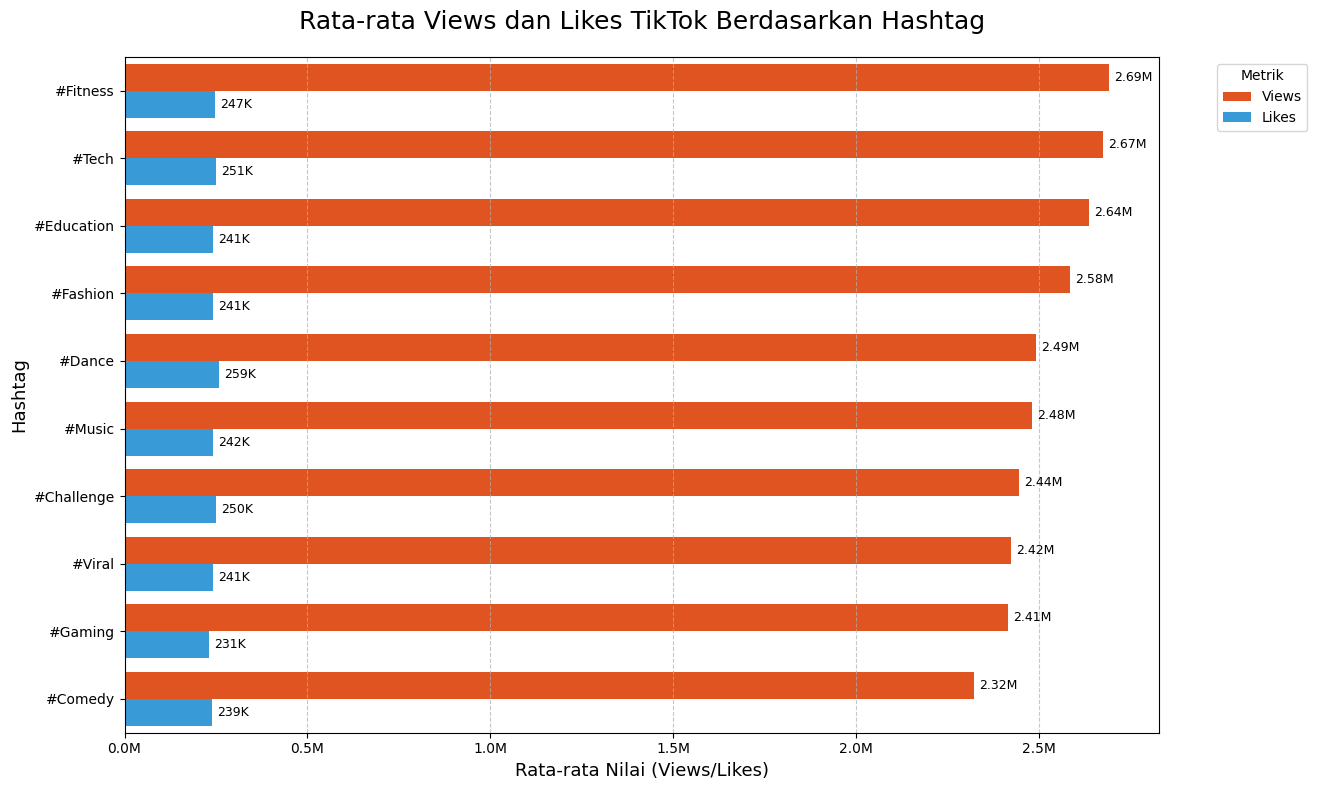

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data dari gambar yang Anda berikan (hashtag_tiktok=tiktok.groupby('Hashtag')[['Views', 'Likes']].mean().round().sort_values('Views', ascending=False))
data = {
    'Hashtag': ['#Fitness', '#Tech', '#Education', '#Fashion', '#Dance',
                '#Music', '#Challenge', '#Viral', '#Gaming', '#Comedy'],
    'Views': [2691882.0, 2673250.0, 2635791.0, 2584465.0, 2490825.0,
              2480949.0, 2444834.0, 2422529.0, 2413461.0, 2320651.0],
    'Likes': [246933.0, 250868.0, 241163.0, 240733.0, 259275.0,
              241594.0, 250214.0, 240533.0, 231231.0, 239242.0]
}

df_hashtag_tiktok = pd.DataFrame(data)

# Melebur (melt) DataFrame untuk format yang cocok untuk grouped bar chart
df_melted_tiktok = df_hashtag_tiktok.melt(id_vars='Hashtag', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8)) # Ukuran figure yang lebih besar

# Membuat Grouped Bar Chart menggunakan Seaborn
sns.barplot(
    x='Value',
    y='Hashtag',
    hue='Metric',
    data=df_melted_tiktok,
    palette={'Views': '#FF4500', 'Likes': '#1DA1F2'}, # Menggunakan warna yang lebih cerah/sesuai TikTok/media sosial
)

# Menambahkan judul dan label
plt.title('Rata-rata Views dan Likes TikTok Berdasarkan Hashtag', fontsize=18, pad=20)
plt.xlabel('Rata-rata Nilai (Views/Likes)', fontsize=13)
plt.ylabel('Hashtag', fontsize=13)

# Mengatur format sumbu X agar lebih mudah dibaca (dalam juta)
plt.ticklabel_format(style='plain', axis='x')
formatter = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Menambahkan nilai di samping setiap batang dengan akurasi yang lebih baik
for i, row in df_melted_tiktok.iterrows():
    # Dapatkan objek bar yang sesuai untuk penempatan teks
    bars = plt.gca().containers
    if row['Metric'] == 'Views':
        idx_in_container = df_hashtag_tiktok.index[df_hashtag_tiktok['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[0][idx_in_container] # Asumsi bars[0] adalah Views
    else: # Likes
        idx_in_container = df_hashtag_tiktok.index[df_hashtag_tiktok['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[1][idx_in_container] # Asumsi bars[1] adalah Likes

    x_pos_text = bar_obj.get_width() + (plt.xlim()[1] * 0.005) # Offset dari ujung batang
    y_pos_text = bar_obj.get_y() + bar_obj.get_height() / 2

    # Format nilai: Views dalam M (2 desimal), Likes dalam K (0 desimal jika < 1M), atau M
    if row['Metric'] == 'Views':
        text_val = f'{row["Value"]/1000000:.2f}M'
    else: # Likes
        text_val = f'{row["Value"]/1000:.0f}K' if row["Value"] < 1000000 else f'{row["Value"]/1000000:.2f}M'

    plt.text(x_pos_text,
             y_pos_text,
             text_val,
             color='black',
             ha="left",
             va="center",
             fontsize=9)


plt.grid(axis='x', linestyle='--', alpha=0.7) # Menambahkan grid horizontal

# Memindahkan legenda agar tidak menutupi plot
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Sesuaikan layout agar legenda tidak terpotong
plt.show()

# Youtube

In [ ]:
youtube=df[df['Platform']=='YouTube']
youtube

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
3,Post_4,2022,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
6,Post_7,2022,YouTube,#Comedy,Tweet,Japan,627233,84121,97973,32648,Medium
7,Post_8,2022,YouTube,#Gaming,Shorts,UK,2066886,317502,45222,33638,High
12,Post_13,2022,YouTube,#Viral,Shorts,Canada,4105651,195560,37627,49089,High
13,Post_14,2022,YouTube,#Fitness,Reel,Japan,1633015,312907,45774,30725,High
...,...,...,...,...,...,...,...,...,...,...,...
4982,Post_4983,2022,YouTube,#Education,Post,Canada,1661096,169872,45417,38557,Low
4990,Post_4991,2022,YouTube,#Viral,Reel,Australia,4989926,393298,99274,29395,Low
4993,Post_4994,2022,YouTube,#Education,Tweet,USA,3515254,213701,61770,25198,Medium
4995,Post_4996,2023,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High


In [ ]:
c=youtube.groupby('Content_Type')['Views'].mean().round().sort_values(ascending=False)
c

,Views
Content_Type,
Live Stream,2657562.0
Reel,2633585.0
Tweet,2585342.0
Video,2539005.0
Shorts,2518589.0
Post,2351429.0


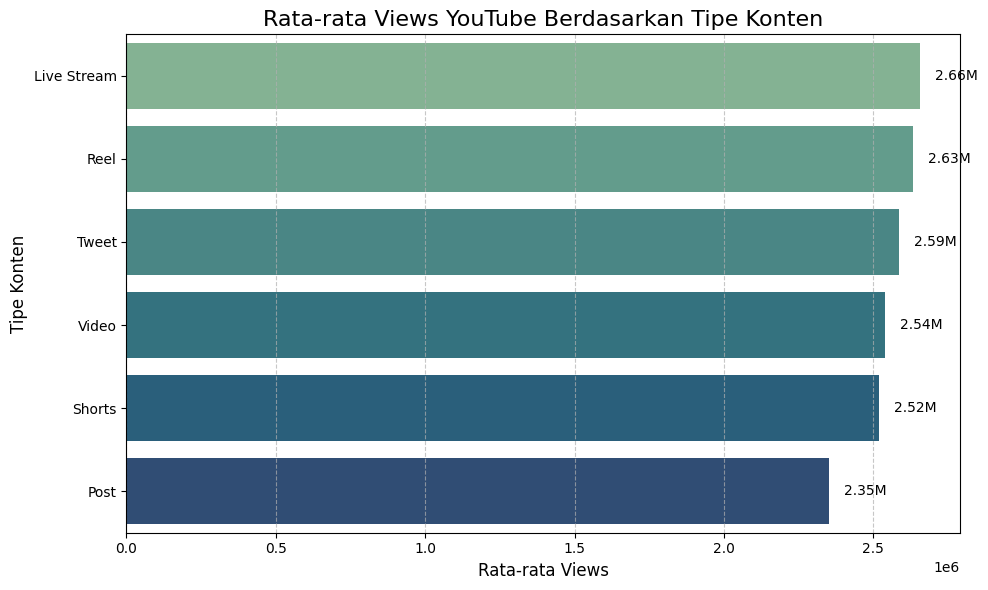

In [ ]:
c_df = c.reset_index()
c_df.columns = ['Content_Type', 'Views']

# Sort the DataFrame by 'Views' in descending order
c_df_sorted = c_df.sort_values('Views', ascending=False)

plt.figure(figsize=(10, 6))

# Create the bar chart using the sorted DataFrame
sns.barplot(x='Views', y='Content_Type', data=c_df_sorted, palette='crest', hue='Content_Type', legend=False)

plt.title('Rata-rata Views YouTube Berdasarkan Tipe Konten', fontsize=16)
plt.xlabel('Rata-rata Views', fontsize=12)
plt.ylabel('Tipe Konten', fontsize=12)

# Add the average views as text labels on the bars
for index, row in enumerate(c_df_sorted.itertuples()):
    plt.text(row.Views + 50000, index, f'{row.Views/1000000:.2f}M', color='black', ha="left", va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hastag_youtube=youtube.groupby('Hashtag')[['Views','Likes']].mean().round().sort_values('Views',ascending=False)
hastag_youtube

,Views,Likes
Hashtag,,
#Music,2729542.0,260292.0
#Fitness,2643532.0,277314.0
#Gaming,2640447.0,252287.0
#Dance,2573366.0,262171.0
#Comedy,2569033.0,263741.0
#Education,2538623.0,251575.0
#Challenge,2477975.0,241749.0
#Tech,2462977.0,254163.0
#Viral,2445699.0,254987.0


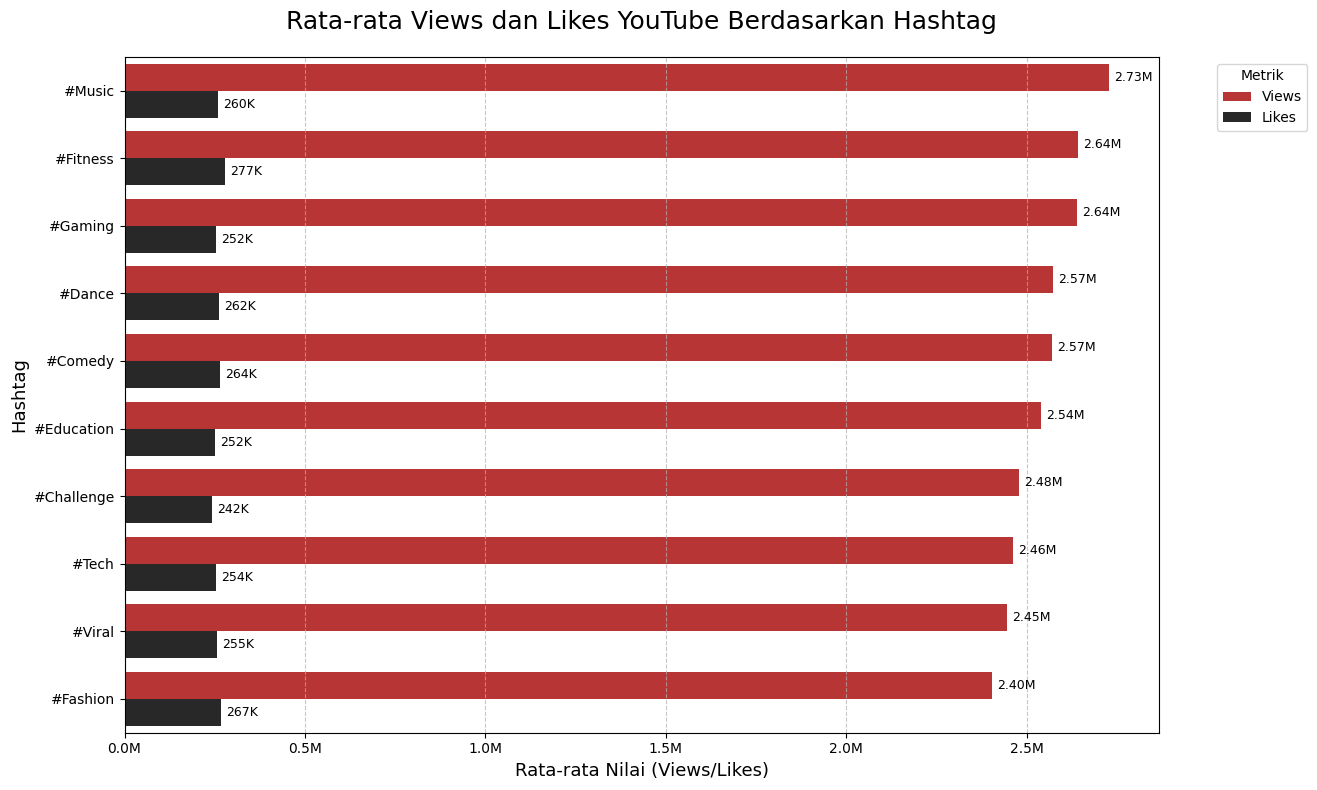

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Diperlukan untuk beberapa fungsi, meskipun tidak langsung digunakan untuk data ini

# Data dari gambar yang Anda berikan (hastag_youtube=youtube.groupby('Hashtag')[['Views', 'Likes']].mean().round().sort_values('Views', ascending=False))
data = {
    'Hashtag': ['#Music', '#Fitness', '#Gaming', '#Dance', '#Comedy',
                '#Education', '#Challenge', '#Tech', '#Viral', '#Fashion'],
    'Views': [2729542.0, 2643532.0, 2640447.0, 2573366.0, 2569033.0,
              2538623.0, 2477975.0, 2462977.0, 2445699.0, 2404279.0],
    'Likes': [260292.0, 277314.0, 252287.0, 262171.0, 263741.0,
              251575.0, 241749.0, 254163.0, 254987.0, 266596.0]
}

df_hashtag_youtube = pd.DataFrame(data)

# Melebur (melt) DataFrame untuk format yang cocok untuk grouped bar chart
df_melted_youtube = df_hashtag_youtube.melt(id_vars='Hashtag', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8)) # Ukuran figure yang lebih besar

# Membuat Grouped Bar Chart menggunakan Seaborn
sns.barplot(
    x='Value',
    y='Hashtag',
    hue='Metric',
    data=df_melted_youtube,
    palette={'Views': '#CD201F', 'Likes': '#282828'}, # Warna khas YouTube (merah dan abu-abu gelap)
)

# Menambahkan judul dan label
plt.title('Rata-rata Views dan Likes YouTube Berdasarkan Hashtag', fontsize=18, pad=20)
plt.xlabel('Rata-rata Nilai (Views/Likes)', fontsize=13)
plt.ylabel('Hashtag', fontsize=13)

# Mengatur format sumbu X agar lebih mudah dibaca (dalam juta)
plt.ticklabel_format(style='plain', axis='x')
formatter = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Menambahkan nilai di samping setiap batang dengan akurasi yang lebih baik
for i, row in df_melted_youtube.iterrows():
    # Dapatkan objek bar yang sesuai untuk penempatan teks
    bars = plt.gca().containers
    if row['Metric'] == 'Views':
        idx_in_container = df_hashtag_youtube.index[df_hashtag_youtube['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[0][idx_in_container] # Asumsi bars[0] adalah Views
    else: # Likes
        idx_in_container = df_hashtag_youtube.index[df_hashtag_youtube['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[1][idx_in_container] # Asumsi bars[1] adalah Likes

    x_pos_text = bar_obj.get_width() + (plt.xlim()[1] * 0.005) # Offset dari ujung batang
    y_pos_text = bar_obj.get_y() + bar_obj.get_height() / 2

    # Format nilai: Views dalam M (2 desimal), Likes dalam K (0 desimal jika < 1M), atau M
    if row['Metric'] == 'Views':
        text_val = f'{row["Value"]/1000000:.2f}M'
    else: # Likes
        text_val = f'{row["Value"]/1000:.0f}K' if row["Value"] < 1000000 else f'{row["Value"]/1000000:.2f}M'

    plt.text(x_pos_text,
             y_pos_text,
             text_val,
             color='black',
             ha="left",
             va="center",
             fontsize=9)


plt.grid(axis='x', linestyle='--', alpha=0.7) # Menambahkan grid horizontal

# Memindahkan legenda agar tidak menutupi plot
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Sesuaikan layout agar legenda tidak terpotong
plt.show()

# Twitter

In [ ]:
twiter=df[df['Platform']=='Twitter']
twiter

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
2,Post_3,2022,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
8,Post_9,2022,Twitter,#Education,Live Stream,India,2169523,496078,96041,30174,Medium
11,Post_12,2023,Twitter,#Music,Reel,Australia,4585669,465871,69083,8999,Medium
14,Post_15,2023,Twitter,#Comedy,Post,Germany,2471790,370802,54110,17081,High
16,Post_17,2023,Twitter,#Dance,Reel,UK,294870,213142,20351,20767,Low
...,...,...,...,...,...,...,...,...,...,...,...
4970,Post_4971,2022,Twitter,#Fitness,Live Stream,USA,263389,330087,71596,11742,Low
4971,Post_4972,2023,Twitter,#Challenge,Shorts,Brazil,3039791,115048,35046,6967,Medium
4972,Post_4973,2022,Twitter,#Fashion,Live Stream,UK,3039823,416310,28532,466,Low
4974,Post_4975,2023,Twitter,#Viral,Tweet,Canada,4511374,464123,60086,15982,Medium


In [ ]:
d=twiter.groupby('Content_Type')['Views'].mean().round().sort_values(ascending=False)
d

,Views
Content_Type,
Video,2559595.0
Shorts,2542174.0
Live Stream,2541360.0
Post,2480927.0
Reel,2462071.0
Tweet,2461069.0


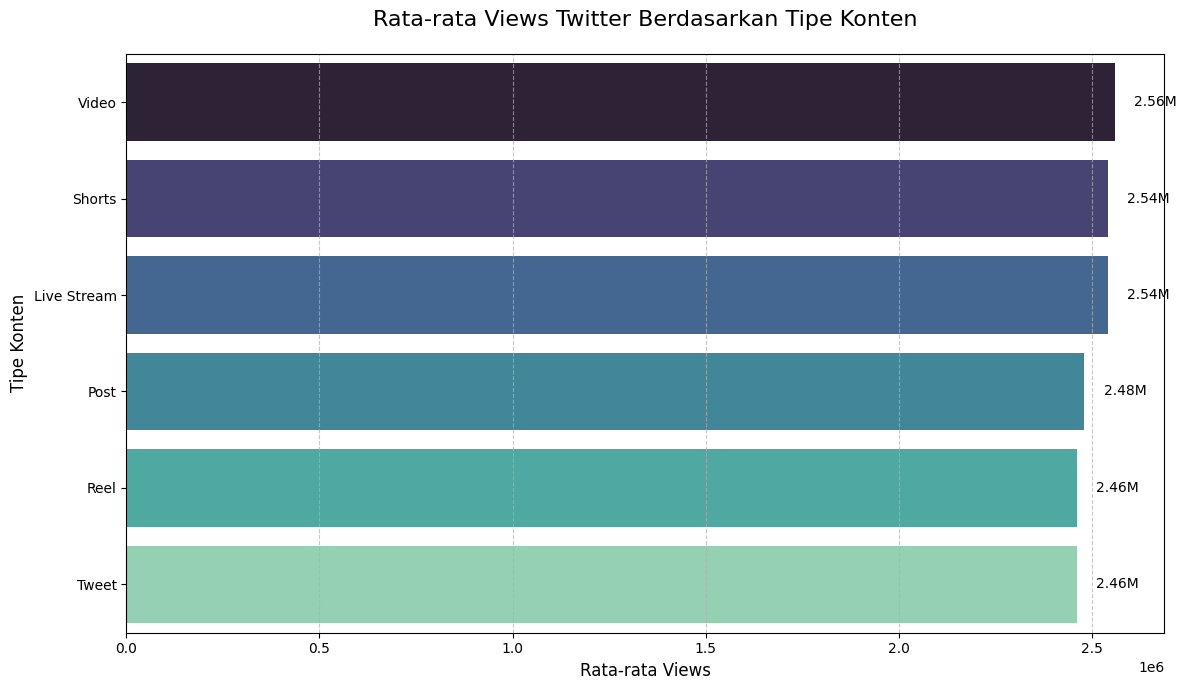

In [ ]:
d_df = d.reset_index()
d_df.columns = ['Content_Type', 'Views']

# Sort the DataFrame by 'Views' in descending order
d_df_sorted = d_df.sort_values('Views', ascending=False)

plt.figure(figsize=(12, 7))

# Create the bar chart using the sorted DataFrame
sns.barplot(x='Views', y='Content_Type', data=d_df_sorted, palette='mako', hue='Content_Type', legend=False)

plt.title('Rata-rata Views Twitter Berdasarkan Tipe Konten', fontsize=16, pad=20)
plt.xlabel('Rata-rata Views', fontsize=12)
plt.ylabel('Tipe Konten', fontsize=12)

# Add the average views as text labels on the bars
for index, row in enumerate(d_df_sorted.itertuples()):
    plt.text(row.Views + 50000, index, f'{row.Views/1000000:.2f}M', color='black', ha="left", va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hastag_twiter=twiter.groupby('Hashtag')[['Views','Likes']].mean().round().sort_values('Views',ascending=False)
hastag_twiter

,Views,Likes
Hashtag,,
#Fitness,2790400.0,233243.0
#Dance,2652286.0,214130.0
#Music,2607921.0,234543.0
#Education,2556640.0,278772.0
#Viral,2463711.0,235476.0
#Comedy,2463617.0,261458.0
#Fashion,2459541.0,267342.0
#Challenge,2449399.0,229470.0
#Gaming,2367189.0,235238.0


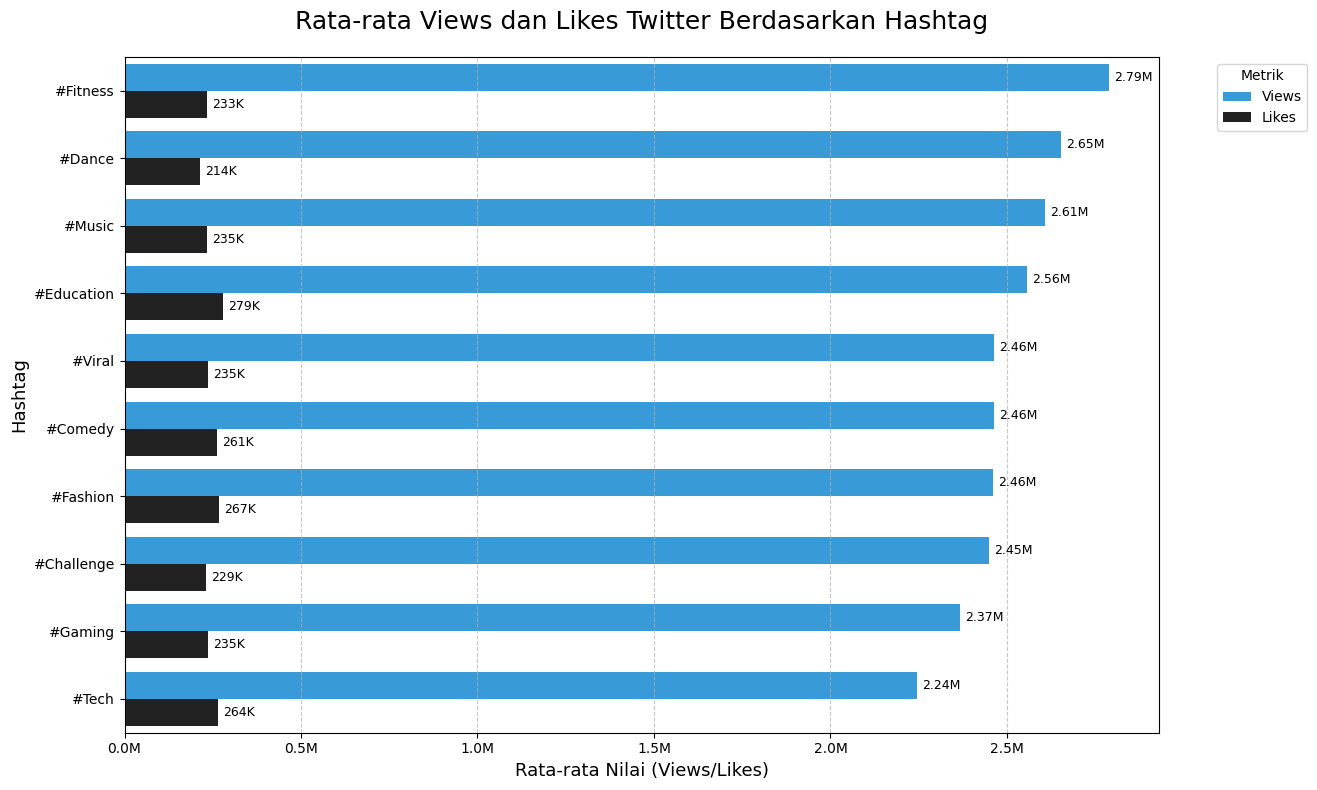

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data dari gambar yang Anda berikan (hastag_twitter=twitter.groupby('Hashtag')[['Views', 'Likes']].mean().round().sort_values('Views', ascending=False))
data = {
    'Hashtag': ['#Fitness', '#Dance', '#Music', '#Education', '#Viral',
                '#Comedy', '#Fashion', '#Challenge', '#Gaming', '#Tech'],
    'Views': [2790400.0, 2652286.0, 2607921.0, 2556640.0, 2463711.0,
              2463617.0, 2459541.0, 2449399.0, 2367189.0, 2243925.0],
    'Likes': [233243.0, 214130.0, 234543.0, 278772.0, 235476.0,
              261458.0, 267342.0, 229470.0, 235238.0, 263787.0]
}

df_hashtag_twitter = pd.DataFrame(data)

# Melebur (melt) DataFrame untuk format yang cocok untuk grouped bar chart
df_melted_twitter = df_hashtag_twitter.melt(id_vars='Hashtag', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8)) # Ukuran figure yang lebih besar

# Membuat Grouped Bar Chart menggunakan Seaborn
sns.barplot(
    x='Value',
    y='Hashtag',
    hue='Metric',
    data=df_melted_twitter,
    palette={'Views': '#1DA1F2', 'Likes': '#222222'}, # Warna khas Twitter (biru dan abu-abu gelap)
)

# Menambahkan judul dan label
plt.title('Rata-rata Views dan Likes Twitter Berdasarkan Hashtag', fontsize=18, pad=20)
plt.xlabel('Rata-rata Nilai (Views/Likes)', fontsize=13)
plt.ylabel('Hashtag', fontsize=13)

# Mengatur format sumbu X agar lebih mudah dibaca (dalam juta)
plt.ticklabel_format(style='plain', axis='x')
formatter = plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Menambahkan nilai di samping setiap batang dengan akurasi yang lebih baik
for i, row in df_melted_twitter.iterrows():
    # Dapatkan objek bar yang sesuai untuk penempatan teks
    bars = plt.gca().containers
    if row['Metric'] == 'Views':
        idx_in_container = df_hashtag_twitter.index[df_hashtag_twitter['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[0][idx_in_container] # Asumsi bars[0] adalah Views
    else: # Likes
        idx_in_container = df_hashtag_twitter.index[df_hashtag_twitter['Hashtag'] == row['Hashtag']].tolist()[0]
        bar_obj = bars[1][idx_in_container] # Asumsi bars[1] adalah Likes

    x_pos_text = bar_obj.get_width() + (plt.xlim()[1] * 0.005) # Offset dari ujung batang
    y_pos_text = bar_obj.get_y() + bar_obj.get_height() / 2

    # Format nilai: Views dalam M (2 desimal), Likes dalam K (0 desimal jika < 1M), atau M
    if row['Metric'] == 'Views':
        text_val = f'{row["Value"]/1000000:.2f}M'
    else: # Likes
        text_val = f'{row["Value"]/1000:.0f}K' if row["Value"] < 1000000 else f'{row["Value"]/1000000:.2f}M'

    plt.text(x_pos_text,
             y_pos_text,
             text_val,
             color='black',
             ha="left",
             va="center",
             fontsize=9)


plt.grid(axis='x', linestyle='--', alpha=0.7) # Menambahkan grid horizontal

# Memindahkan legenda agar tidak menutupi plot
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Sesuaikan layout agar legenda tidak terpotong
plt.show()

# Total Views Berdasarkan Region dan Platform 2022 & 2023

In [ ]:
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [ ]:

#pivot table dengan index region, dan kolom platform serta value nya views
df_pivot = df.pivot_table(index='Region', columns='Platform', values='Views', aggfunc='sum').round()
df_pivot

Platform,Instagram,TikTok,Twitter,YouTube
Region,,,,
Australia,346981115,347185688,354795951,413234693
Brazil,367777234,426315866,410079124,435330003
Canada,428890123,373529245,375531480,429836134
Germany,365926843,386770445,289278998,399324413
India,394198523,352668532,376879273,389625955
Japan,279821398,424265323,382566884,343539715
UK,371344769,443591209,338272738,465818807
USA,358804807,414593098,489825074,493728760


In [ ]:
tahun_2022=df.loc[df['Post_Date']==2022]
tahun_2022

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
5,Post_6,2022,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low
...,...,...,...,...,...,...,...,...,...,...,...
4991,Post_4992,2022,Instagram,#Fashion,Shorts,Brazil,10157,322897,93292,23766,High
4993,Post_4994,2022,YouTube,#Education,Tweet,USA,3515254,213701,61770,25198,Medium
4994,Post_4995,2022,Instagram,#Comedy,Shorts,Brazil,940934,436187,12363,11054,Low
4997,Post_4998,2022,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low


In [ ]:

#pivot table dengan index region, dan kolom platform serta value nya views
df_pivot_2022 = tahun_2022.pivot_table(index='Region', columns='Platform', values='Views', aggfunc='sum').round()
df_pivot_2022

Platform,Instagram,TikTok,Twitter,YouTube
Region,,,,
Australia,132485024,186480809,175905942,219400234
Brazil,189653052,257836373,193449173,218363207
Canada,225883892,214484324,152121382,194916906
Germany,202040372,176357119,154829295,171026817
India,217999605,187051882,204076130,181871908
Japan,143428630,241402812,187200164,155025871
UK,168557426,268087654,145200193,230830835
USA,179998051,193327695,240228869,254388857


/tmp/ipython-input-95-1020279445.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df_2022 = df_pivot_2022.applymap(lambda x: f'{x/1000000:.1f}M')


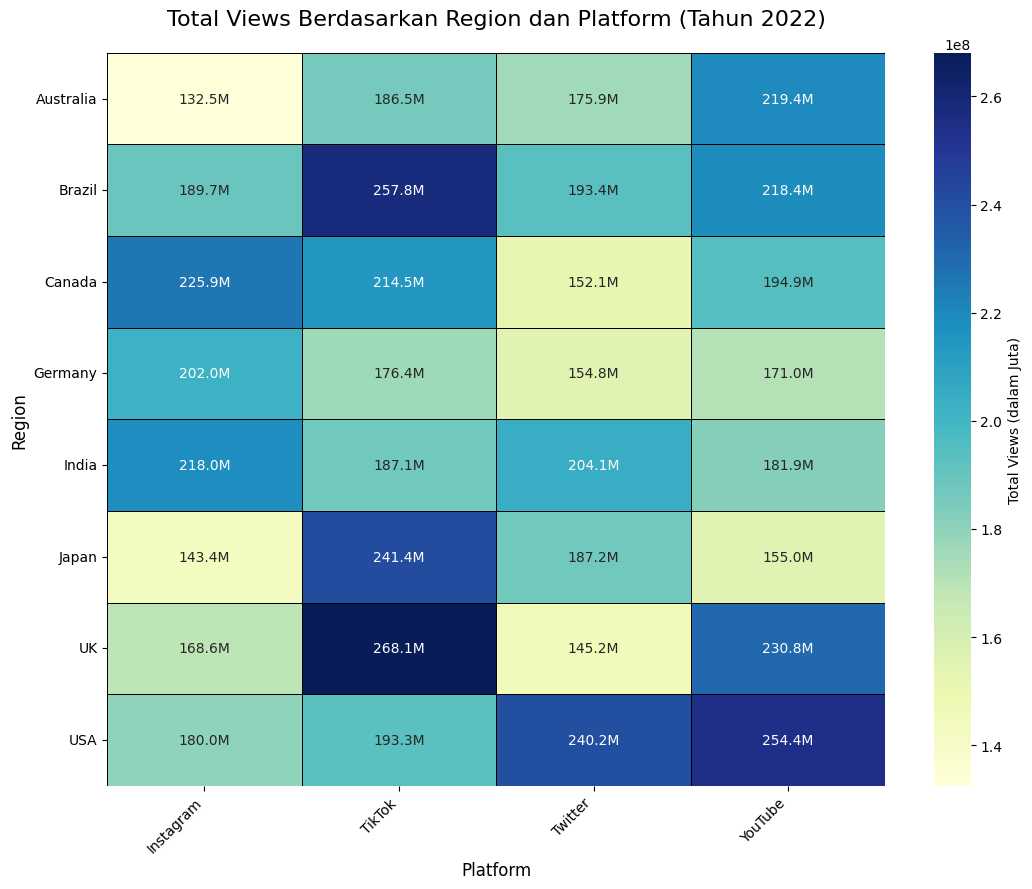

In [ ]:

plt.figure(figsize=(11, 9)) # Ukuran figure disesuaikan

# Untuk menampilkan anotasi dalam format jutaan (misal: "132.5M"),
# kita membuat DataFrame anotasi terpisah yang sudah diformat string.
# Menggunakan :.1f untuk satu desimal setelah pembagian dengan 1 juta.
annot_df_2022 = df_pivot_2022.applymap(lambda x: f'{x/1000000:.1f}M')

sns.heatmap(
    df_pivot_2022,
    annot=annot_df_2022, # Menggunakan DataFrame anotasi yang sudah diformat
    fmt="",              # Mengatur fmt menjadi string kosong karena anotasi sudah string
    cmap="YlGnBu",       # Skema warna yang cocok untuk data kumulatif/sum
    linewidths=.5,       # Garis di antara sel
    linecolor='black',   # Warna garis
    cbar_kws={'label': 'Total Views (dalam Juta)'} # Label untuk color bar
)

# Menambahkan judul dan label
plt.title('Total Views Berdasarkan Region dan Platform (Tahun 2022)', fontsize=16, pad=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Rotasi label sumbu X jika terlalu panjang
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen pas
plt.show()

# Tahun 2023

In [ ]:
tahun_2023=df.loc[df['Post_Date']==2023]
tahun_2023

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4,Post_5,2023,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
9,Post_10,2023,TikTok,#Gaming,Shorts,India,3898384,8634,69378,42700,Low
10,Post_11,2023,Instagram,#Comedy,Live Stream,Germany,4070332,379894,46012,25242,High
11,Post_12,2023,Twitter,#Music,Reel,Australia,4585669,465871,69083,8999,Medium
14,Post_15,2023,Twitter,#Comedy,Post,Germany,2471790,370802,54110,17081,High
...,...,...,...,...,...,...,...,...,...,...,...
4989,Post_4990,2023,Instagram,#Fitness,Shorts,Australia,535624,202764,39983,22546,Medium
4992,Post_4993,2023,Twitter,#Viral,Tweet,Brazil,2026985,197746,92346,37291,Low
4995,Post_4996,2023,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,2023,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium


In [ ]:

#pivot table dengan index region, dan kolom platform serta value nya views
df_pivot_2023 = tahun_2023.pivot_table(index='Region', columns='Platform', values='Views', aggfunc='sum').round()
df_pivot_2023

Platform,Instagram,TikTok,Twitter,YouTube
Region,,,,
Australia,214496091,160704879,178890009,193834459
Brazil,178124182,168479493,216629951,216966796
Canada,203006231,159044921,223410098,234919228
Germany,163886471,210413326,134449703,228297596
India,176198918,165616650,172803143,207754047
Japan,136392768,182862511,195366720,188513844
UK,202787343,175503555,193072545,234987972
USA,178806756,221265403,249596205,239339903


/tmp/ipython-input-101-3933135005.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df_2023 = df_pivot_2023.applymap(lambda x: f'{x/1000000:.1f}M')


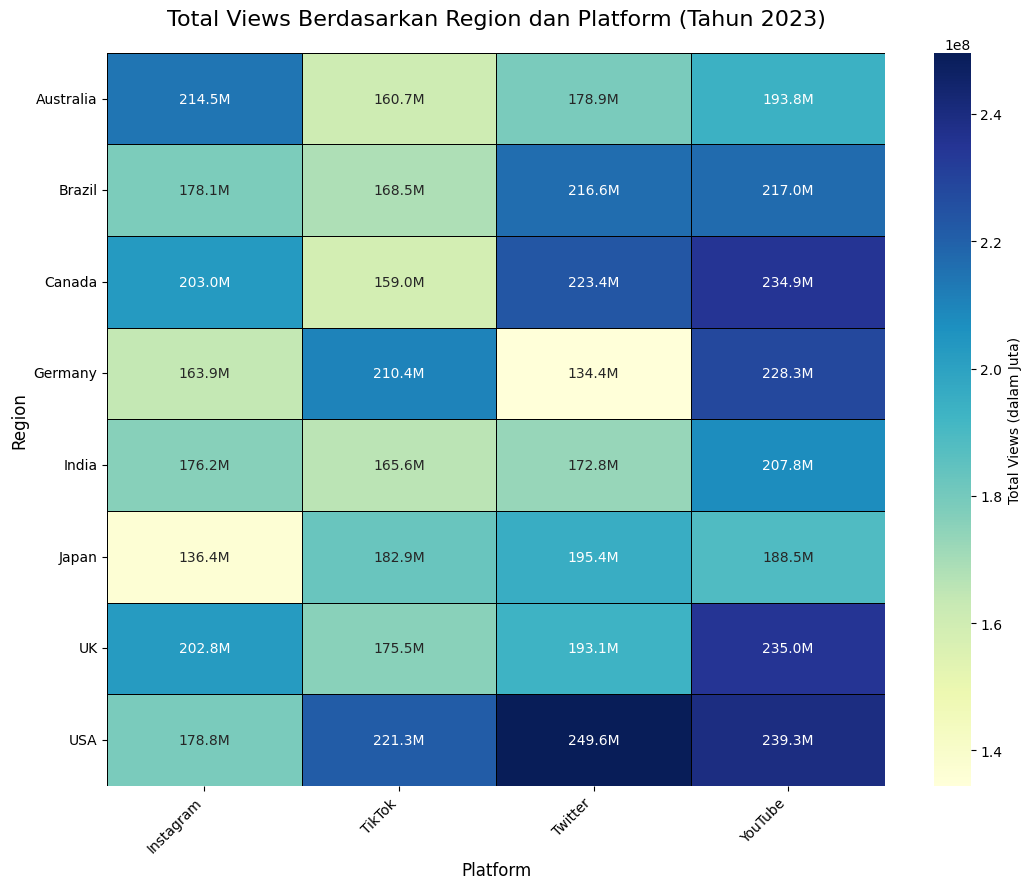

In [ ]:
# --- Heatmap dengan Nilai dalam Bentuk Jutaan ---

plt.figure(figsize=(11, 9)) # Ukuran figure yang cocok

# Buat DataFrame anotasi terpisah yang sudah diformat string dalam jutaan
annot_df_2023 = df_pivot_2023.applymap(lambda x: f'{x/1000000:.1f}M')

sns.heatmap(
    df_pivot_2023,
    annot=annot_df_2023, # Menggunakan DataFrame anotasi yang sudah diformat
    fmt="",              # Mengatur fmt menjadi string kosong karena anotasi sudah string
    cmap="YlGnBu",       # Skema warna yang cocok untuk data kumulatif/sum
    linewidths=.5,       # Garis di antara sel
    linecolor='black',   # Warna garis
    cbar_kws={'label': 'Total Views (dalam Juta)'} # Label untuk color bar
)

# Menambahkan judul dan label
plt.title('Total Views Berdasarkan Region dan Platform (Tahun 2023)', fontsize=16, pad=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Rotasi label sumbu X jika terlalu panjang
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen pas
plt.show()

  dari semua data dan grafik yang udah kita bedah, ini dia beberapa poin penting yang bisa jadi pegangan perusahaan:

- Nggak Asal Nyebar: Dari rata-rata views dan likes per jenis konten atau hashtag di Instagram, TikTok, Twitter, sama YouTube, kita jadi tahu nih, konten kayak apa sih yang paling "nyambung" sama audiens di tiap platform. Jadi, nggak cuma posting aja, tapi posting yang pas.

- Nyari "Tempat Kumpul" Terbaik: Dengan ngeliat perbandingan performa antar platform dan juga antar negara (region), kita bisa nemuin "sarang empuk" di mana calon pelanggan kita paling banyak nongkrong. Ini penting banget biar promosi kita nyasar ke orang yang tepat.

- Berapa Banyak Kontribusi Tiap Platform: Grafik persentase itu nunjukkin seberapa besar sih sumbangan tiap platform atau wilayah ke total views kita. Ibaratnya, kalau ada 100% perhatian audiens di suatu region, berapa persennya sih yang didapet Instagram, TikTok, Twitter, atau YouTube? Ini bikin kita bisa ngatur anggaran iklan lebih cerdas.

- Nggak Kaget Sama Perubahan: Waktu kita bandingin data tahun 2022 dan 2023, kita bisa ngeliat gimana sih selera audiens itu berubah. Jadi, perusahaan bisa siap-siap dan nggak ketinggalan tren, malah bisa jadi yang pertama manfaatin tren baru.

- Promosi Nggak Ngawur: Ujung-ujungnya, semua insight dari data ini bakal jadi panduan buat perusahaan ngambil keputusan marketing yang bener-bener berdasarkan fakta, bukan cuma kira-kira. Jadi, promosi bisa lebih "kena" sasaran.

- Investasi Auto Untung: Dengan strategi yang tepat, artinya perusahaan bisa dapetin hasil maksimal dari tiap rupiah yang dikeluarin buat iklan (ROI-nya jadi bagus). Merek pun makin dikenal luas di dunia media sosial.

intinya, ini semua tentang jadi pintar di media sosial. Nggak cuma ikutan rame, tapi jadi pemain yang strategis!